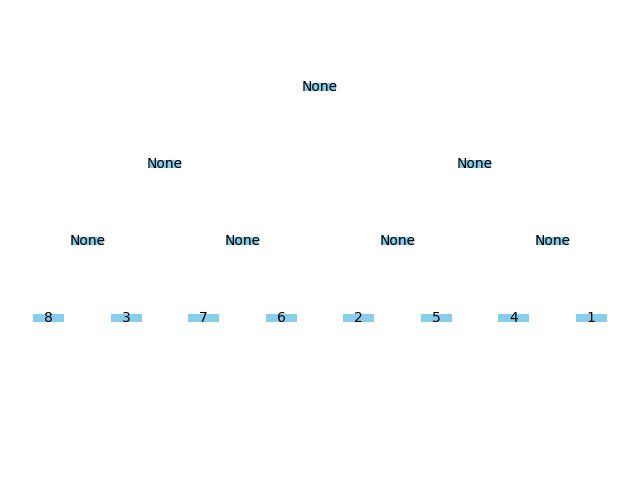

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
from IPython.display import HTML

# 노드 클래스 정의
class Node:
    def __init__(self, value, x, y, depth):
        self.value = value
        self.x = x
        self.y = y
        self.depth = depth
        self.left = None
        self.right = None

# 트리를 생성하는 함수
def build_tree(arr, x=0, y=0, depth=0):
    # 배열의 크기가 1일 경우 단일 노드 생성
    if len(arr) == 1:
        return Node(arr[0], x, y, depth)  # 값과 좌표, 깊이를 지정하여 리프 노드 생성
    
    # 배열을 반으로 나누어 재귀적으로 왼쪽과 오른쪽 서브트리 생성
    mid = len(arr) // 2  # 중간 인덱스 계산
    left = build_tree(arr[:mid], x - 1/(2**(depth+1)), y - 1, depth + 1)  # 왼쪽 하위 배열로 트리 생성
    right = build_tree(arr[mid:], x + 1/(2**(depth+1)), y - 1, depth + 1)  # 오른쪽 하위 배열로 트리 생성
    
    # 부모 노드를 생성하고 좌우 자식을 연결
    node = Node(None, x, y, depth)  # 값은 None으로 설정 (병합된 값이 나중에 채워짐)
    node.left = left  # 왼쪽 자식을 부모 노드에 연결
    node.right = right  # 오른쪽 자식을 부모 노드에 연결
    return node  # 생성된 노드 반환

# 병합 정렬을 트리를 순회하며 수행하는 함수
frames = []  # 애니메이션을 위한 프레임 저장 리스트

def merge_sort_tree(node):
    # 리프 노드인 경우 정렬된 값 리스트 반환
    if node.left is None and node.right is None:
        return [node.value]  # 리프 노드의 값을 리스트 형태로 반환
    
    # 왼쪽 서브트리를 정렬
    left_sorted = merge_sort_tree(node.left)
    
    # 오른쪽 서브트리를 정렬
    right_sorted = merge_sort_tree(node.right)
    
    # 병합 단계: 두 정렬된 리스트를 하나로 병합
    merged = []  # 병합된 결과를 저장할 리스트
    i = j = 0  # 두 리스트의 현재 위치를 나타내는 인덱스 초기화
    
    # 두 리스트를 병합하면서 정렬 수행
    while i < len(left_sorted) and j < len(right_sorted):
        if left_sorted[i] <= right_sorted[j]:  # 왼쪽 리스트 값이 작거나 같을 경우 추가
            merged.append(left_sorted[i])
            i += 1  # 왼쪽 리스트의 인덱스를 증가
        else:  # 오른쪽 리스트 값이 작을 경우 추가
            merged.append(right_sorted[j])
            j += 1  # 오른쪽 리스트의 인덱스를 증가
    
    # 나머지 요소를 병합 리스트에 추가
    merged += left_sorted[i:]  # 왼쪽 리스트의 남은 요소 추가
    merged += right_sorted[j:]  # 오른쪽 리스트의 남은 요소 추가
    
    # 현재 노드에 병합된 값을 설정
    node.value = merged  # 노드 값을 병합된 리스트로 업데이트
    
    # 현재 트리 상태를 프레임에 저장 (애니메이션용)
    frames.append(get_frame_data(root))  # 트리의 현재 상태를 저장
    
    return merged  # 병합된 리스트 반환


# 프레임 데이터 추출
def get_frame_data(node):
    nodes = []
    def traverse(n):
        if n is None:
            return
        nodes.append((n.x, n.y, n.value))
        traverse(n.left)
        traverse(n.right)
    traverse(node)
    return nodes

# 애니메이션 업데이트 함수
def update(frame):
    ax.clear()
    for x, y, value in frame:
        rect = patches.Rectangle((x - 0.05, y - 0.05), 0.1, 0.1, facecolor='skyblue')
        ax.add_patch(rect)
        ax.text(x, y, str(value), ha='center', va='center')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-5, 1)
    ax.axis('off')

# 초기 배열 및 트리 생성
arr = [8, 3, 7, 6, 2, 5, 4, 1]
root = build_tree(arr)
frames.append(get_frame_data(root))
merge_sort_tree(root)

# 애니메이션 생성
fig, ax = plt.subplots(figsize=(8, 6))
anim = animation.FuncAnimation(fig, update, frames=frames, interval=1000, repeat=False)

# HTML로 출력
HTML(anim.to_html5_video())
